# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [ ]:
import pandas as pd
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ⌛️ Time is ticking. Good luck!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


<div class="alert alert-success">
    <h1>PART1: Correlation between variables and churn rate

<div class="alert alert-danger">
<h3> Categorical variables

**CHI 2 Test** : In order to see if a categorical variable influence the turn over  we must do a chi2 test to test it statistically. We have two hypothesis :
- H0 : Rate turn over is independant from the variable
- H1 : Rate turn over is influenced by the variable

The higher the CHI2 value is so the stronger the relation. And the higher the p_value is the weaker the   relation. Usually we say that a p_value inferior to 0.05 allows us to reject the null hypothesis. That means the variable do have a influence on the churn rate.

<div class="alert alert-danger">
<h3> Churn by department

 Le chi2 est 4.907981090735216, et la p_value est de 0.8422548401719155


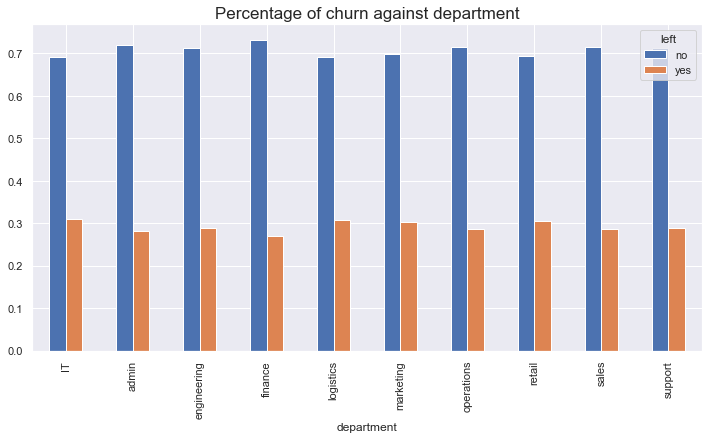

In [ ]:
from scipy.stats import chi2_contingency 

variable = "department"
pd.crosstab(df[variable], df.left, normalize = "index").plot.bar(figsize=(12,6))
plt.title(f"Percentage of churn against {variable}", fontsize = 17)
table  = pd.crosstab(df[variable], df.left)
chi2, pvalue, *_ = chi2_contingency(table, correction = True)
print("="*100)
print(f" Le chi2 est {chi2}, et la p_value est de {pvalue}")
print("="*100)

<div class="alert alert-info">
    <b> Observation </b>
<p>p-value is superior to 0.05. That means we can not reject Ho and we consider that department and churn is independant from each other

<div class="alert alert-danger">
<h3> Churn by salary

 Le chi2 est 1.1483611437561942, et la p_value est de 0.5631661539699939


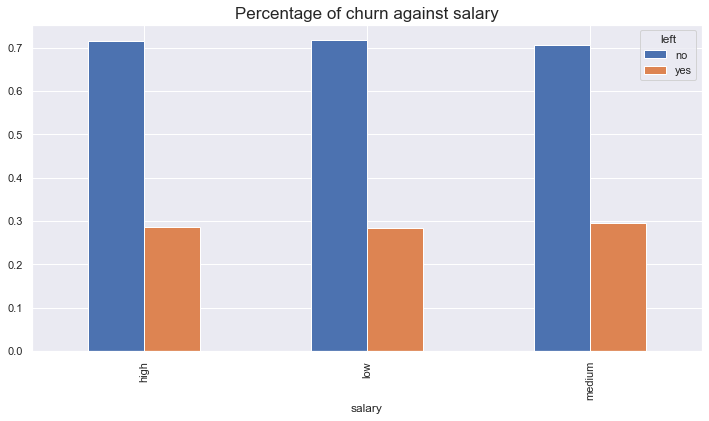

In [ ]:
variable = "salary"
pd.crosstab(df[variable], df.left, normalize = "index").plot.bar(figsize=(12,6))
plt.title(f"Percentage of churn against {variable}", fontsize = 17)
table  = pd.crosstab(df[variable], df.left)
chi2, pvalue, *_ = chi2_contingency(table, correction = True)
print("="*100)
print(f" Le chi2 est {chi2}, et la p_value est de {pvalue}")
print("="*100)

<div class="alert alert-info">
    <b> Observation </b>
<p>With a p_value of 0.56, we can conlude that salary doesn't impact neither the churn rate.

<div class="alert alert-danger">
<h3> Churn by promoted

 Le chi2 est 12.43572533642883, et la p_value est de 0.00042119870637448567


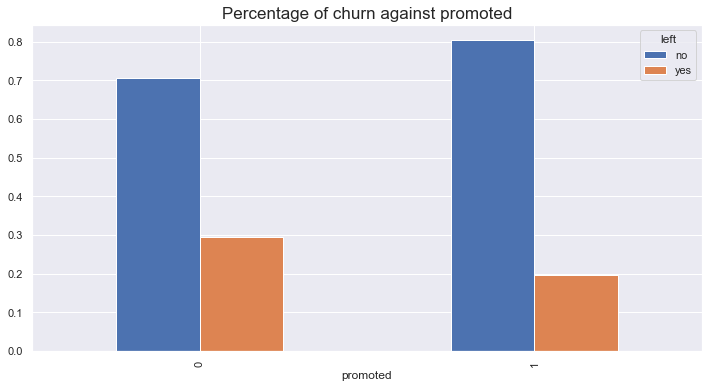

In [ ]:
variable = "promoted"
pd.crosstab(df[variable], df.left, normalize = "index").plot.bar(figsize=(12,6))
plt.title(f"Percentage of churn against {variable}", fontsize = 17)
table  = pd.crosstab(df[variable], df.left)
chi2, pvalue, *_ = chi2_contingency(table, correction = True)
print("="*100)
print(f" Le chi2 est {chi2}, et la p_value est de {pvalue}")
print("="*100)

**Observation** : It seems thats to being promoted the churning rate. Indeed 30% of non promoted left againts 20% for the pomoted ones. We can confirm that with a CHI2 test.
We can reject the null hypothesis that being promoted and churning rate are independant and conlude that the two variables are dependant.

<div class="alert alert-danger">
<h3> Churn by bonus

 Le chi2 est 1.1972733200926768, et la p_value est de 0.27386733558241827


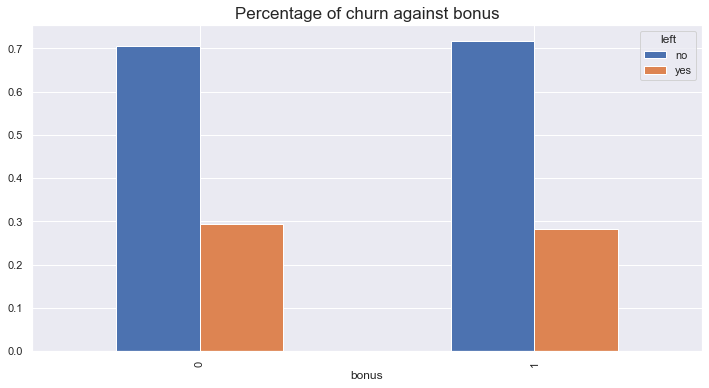

In [ ]:
variable = "bonus"
pd.crosstab(df[variable], df.left, normalize = "index").plot.bar(figsize=(12,6))
plt.title(f"Percentage of churn against {variable}", fontsize = 17)
table  = pd.crosstab(df[variable], df.left)
chi2, pvalue, *_ = chi2_contingency(table, correction = True)
print("="*100)
print(f" Le chi2 est {chi2}, et la p_value est de {pvalue}")
print("="*100)

<div class="alert alert-info">
    <b> Observation </b>
<p>With a high p_value, it seems that Bonus does not influence the churning rate. 


<div class="alert alert-danger">
<h3> Churn by projects

 Le chi2 est 1.4990939229399411, et la p_value est de 0.6824794682388233


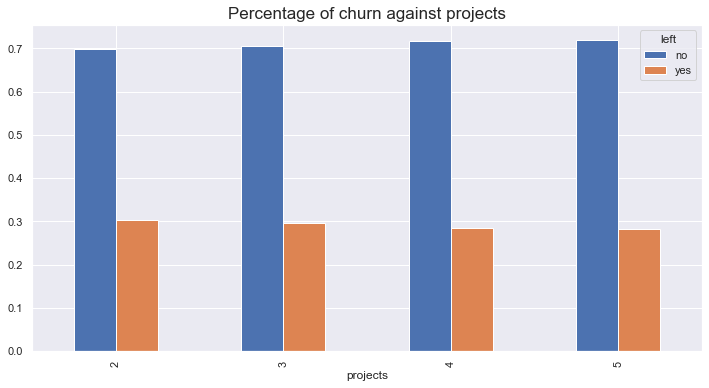

In [ ]:
variable = "projects"
pd.crosstab(df[variable], df.left, normalize = "index").plot.bar(figsize=(12,6))
plt.title(f"Percentage of churn against {variable}", fontsize = 17)
table  = pd.crosstab(df[variable], df.left)
chi2, pvalue, *_ = chi2_contingency(table, correction = True)
print("="*100)
print(f" Le chi2 est {chi2}, et la p_value est de {pvalue}")
print("="*100)

<div class="alert alert-info">
    <b> Observation </b>
<p>With a high p_value, it seems that number of projects does not influence the churning rate. 

 Le chi2 est 660.2859538022366, et la p_value est de 2.0921928050860358e-135


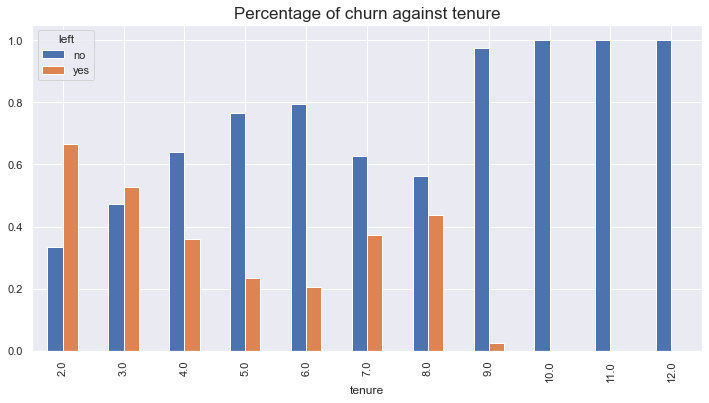

In [ ]:
variable = "tenure"
pd.crosstab(df[variable], df.left, normalize = "index").plot.bar(figsize=(12,6))
plt.title(f"Percentage of churn against {variable}", fontsize = 17)
table  = pd.crosstab(df[variable], df.left)
chi2, pvalue, *_ = chi2_contingency(table, correction = True)
print("="*100)
print(f" Le chi2 est {chi2}, et la p_value est de {pvalue}")
print("="*100)

**Observation**: Except for 7 and 8 years, it seems obvious that the more number of years one stay in the company the 
more one tend to stay. The high value of CHI2 confirms that there is a strong relation between these two variables. According to this observation it seems that the company should take care more carefully of the new comers. Indeed 2 out of 3 of 2 years tenure leave the company.

<div class="alert alert-danger">
<h3> Continuous variable against churn rate

To test if there is a effect of the continuous variable, we will perform an Anova test 1 factor.
With these hypothesis :
- H0 : There is no correlation between churn rate and the  continuous variable
- H1 : There is a correlation between churn rate and the continuous variable

<div class="alert alert-danger">
<h3> Churn by review

,df,sum_sq,mean_sq,F,PR(>F)
left,1.0,6.427721,6.427721,973.292239,1.522017e-203
Residual,9538.0,62.989926,0.006604,NaN,NaN


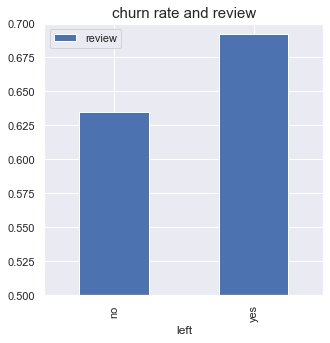

In [ ]:
import statsmodels.api
variable = "review"
df.groupby(by="left").agg({variable:"mean"}).plot.bar(figsize=(5,5))
plt.ylim(0.5, 0.7)
plt.title(f"churn rate and {variable}", fontsize = 15)

anova_df = df[["left",variable]]
result = statsmodels.formula.api.ols(f"{variable}~left", data =anova_df).fit()
statsmodels.api.stats.anova_lm(result)

<div class="alert alert-info">
    <b> Observation </b>
<p>The F value is high and p_value is inferior to 0.05. Its shows that there is a strong relation between the review and the churn rate. This observation is very surprising. It shows that the people who left had a best review. Let's look deeper in that variable.

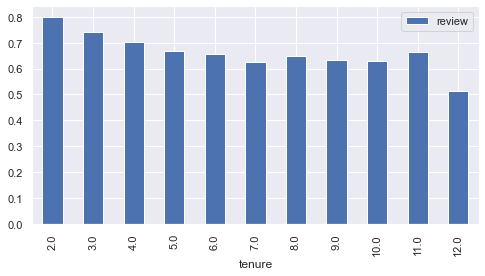

In [ ]:
df.groupby("tenure").agg({"review":"mean"}).plot.bar(figsize=(8,4));

We can see here that the new people get a better review, it's why we measure a non logical correlation between review and churn rate. The root causality here is how many years people have been in the company. To give a better review is not sufficient to make them stay.

<div class="alert alert-danger">
<h3> Churn by satisfaction

,df,sum_sq,mean_sq,F,PR(>F)
left,1.0,0.022660,0.02266,0.90135,0.342444
Residual,9538.0,239.785327,0.02514,NaN,NaN


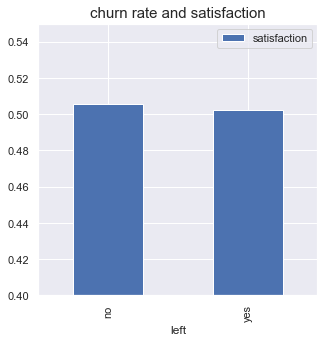

In [ ]:
import statsmodels.api
variable = "satisfaction"
df.groupby(by="left").agg({variable:"mean"}).plot.bar(figsize=(5,5))
plt.ylim(0.4, 0.55)
plt.title(f"churn rate and {variable}", fontsize = 15)

anova_df = df[["left",variable]]
result = statsmodels.formula.api.ols(f"{variable}~left", data =anova_df).fit()
statsmodels.api.stats.anova_lm(result)

<div class="alert alert-info">
    <b> Observation </b>
<p>The F value is low and p_value is superior to 0.05. Its shows that there is no relation between the satisfaction and the churn rate. This observation is surprising. It shows that in general people are not satisfied in this company. The company must act as a whole to improve satisfaction of employees. We will suggest several actions in the conclusion of the part 1.

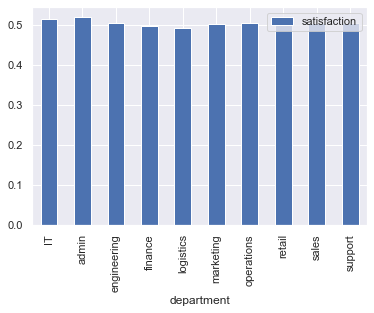

In [ ]:
df.groupby("department").agg({"satisfaction":"mean"}).plot.bar();

**Observation** : We observe that satisfaction rate is low for every department.

<div class="alert alert-danger">
<h3> Churn by monthly hours

,df,sum_sq,mean_sq,F,PR(>F)
left,1.0,13.297172,13.297172,0.77399,0.379008
Residual,9538.0,163863.125203,17.180030,NaN,NaN


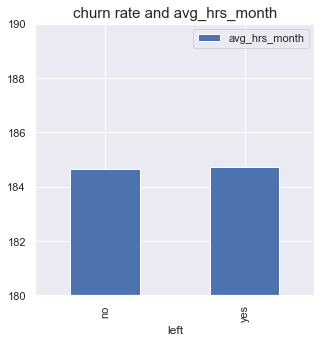

In [ ]:
import statsmodels.api
variable = "avg_hrs_month"
df.groupby(by="left").agg({variable:"mean"}).plot.bar(figsize=(5,5))
plt.ylim(180, 190)
plt.title(f"churn rate and {variable}", fontsize = 15)

anova_df = df[["left",variable]]
result = statsmodels.formula.api.ols(f"{variable}~left", data =anova_df).fit()
statsmodels.api.stats.anova_lm(result)

<div class="alert alert-info">
    <b> Observation </b>
<p>The F value is low and p_value is superior to 0.05. Its shows that there is no relation between the number of hours and the churn rate.

<div class="alert alert-danger">
<h1> Part 1 : Conclusion

We could think that money and bonus would have an inpact on churn rate but the test shows no relation between salary, bonus and churn rate.

According to our statistical tests the variables that have an impact on churn rate are : 
- review
- tenure
- promoted

But we saw that "review" is not directly correlated to churn rate. However the number of years is strongly correlated to the churn rate. The rate of satisfaction is quite low for the whole company. Deep changes in the company must be put in place. In this company we realise that mainly newcomers tend to quit. For example the company could target them and :

- Suggest opportunities of development within the company
- Look after the well-being of the teams
- Offer training
- Organizing parties or dinner with all employees
- Encourage team spirit
- Give them feedback to help them to grow
- Train every manager to manage. Managing people is a sensitive task. Managers could be hired not only for their skills but also for their empathy and their ability to be grateful to their employees.


<div class="alert alert-success">
    <h1>PART 2: Model prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import shap

In [ ]:
#Transformation of categorical variable
import numpy as np
cat_col = ['department', 'salary']
cat = df[cat_col]
cat = pd.get_dummies(cat,drop_first=True)

In [ ]:
num= df.select_dtypes(include='number')

In [ ]:
#normalization
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(num), columns = num.columns)
num_scaled.shape

(9540, 7)

In [ ]:
data = num.join(cat)
data["left"] = df.left

In [ ]:
#Separation between target and variables, and split train/test set
y = data.left
y = y.apply(lambda x : 1 if x=="yes" else 0)

X = data.drop("left", axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.2,random_state=1000)


**In this prediction part we are interested by finding a model who can predict well the true positive, that is to say if people will leave or not.
The metric we are interested in is the Recall. We will search to improve this metric.**

In [ ]:
clf = neighbors.KNeighborsClassifier()

In [ ]:
def training_model(clf):
    clf.fit(X_train,y_train)
    score = cross_val_score(clf,X_train,y_train,cv = 5).mean()
    pred = clf.predict(X_test)
    plot_confusion_matrix(clf,
                          X_test,
                          y_test,)
    plt.grid(False);

    predictions =clf.predict(X_test)
    print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1357
           1       0.61      0.47      0.53       551

    accuracy                           0.76      1908
   macro avg       0.70      0.67      0.68      1908
weighted avg       0.75      0.76      0.75      1908



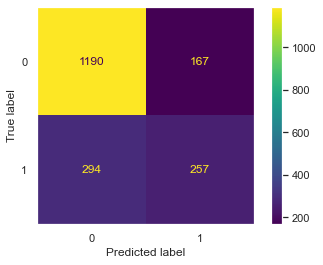

In [ ]:
training_model(neighbors.KNeighborsClassifier())

With a accuracy of 0.76, and a recall for "yes" of 0.47, the score is quite low.

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1357
           1       0.80      0.72      0.76       551

    accuracy                           0.87      1908
   macro avg       0.85      0.83      0.83      1908
weighted avg       0.87      0.87      0.87      1908



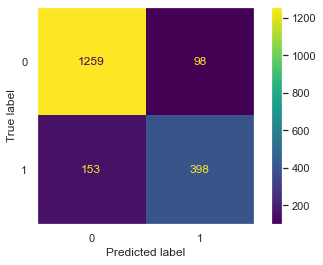

In [ ]:
training_model(clf = RandomForestClassifier())

[22:09:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

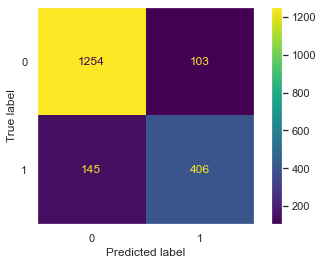

In [ ]:
training_model(clf = XGBClassifier(verbose = None))

The best model for predicting the leaving people is XGBoost with a recall of 0.74. We will then improve this model with a random search.

In [ ]:
# parametre pour XGBoost
params = {
        'min_child_weight': list(np.arange(1,10,1)),
        'gamma': list(np.arange(0.5,5,0.5)),
        'subsample': list(np.arange(0.5,1,0.1)),
        'colsample_bytree': list(np.arange(0.5,1,0.1)),
        'max_depth': list(np.arange(3,5,1))
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, verbosity = 0)

In [ ]:
#validation croisée + recherche des meilleurs hyperparametres avec randomized
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), random_state=1001 )

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f49c5936350>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=0),
                   n_jobs=-1,
                   param_distrib

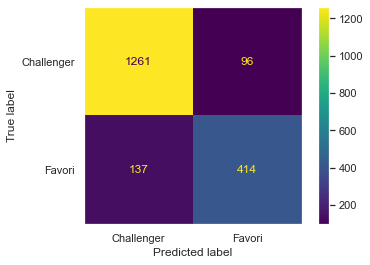

In [ ]:
plot_confusion_matrix(random_search,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Challenger","Favori"])
plt.grid(False)

In [ ]:
predictions =random_search.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1357
           1       0.81      0.75      0.78       551

    accuracy                           0.88      1908
   macro avg       0.86      0.84      0.85      1908
weighted avg       0.88      0.88      0.88      1908



**Observation** : We can observe that we improve the recall score for the leaving people. We can predict 3 times out of 4 if a person will leave the company. Now we can try to understand the reason of leaving by using some interpretability tools.

In [ ]:
random_search.best_params_

{'subsample': 0.7999999999999999,
 'min_child_weight': 9,
 'max_depth': 4,
 'gamma': 2.0,
 'colsample_bytree': 0.8999999999999999}

In [ ]:
#Training the model with the best parameters
xgb = XGBClassifier(subsample= 0.7999999999999999,
 min_child_weight= 9,
 max_dept= 4,
 gamma= 2.0,
 colsample_bytree= 0.8999999999999999)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8999999999999999,
              gamma=2.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_dept=4, max_depth=6, min_child_weight=9,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=16, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7999999999999999,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1357
           1       0.79      0.75      0.77       551

    accuracy                           0.87      1908
   macro avg       0.85      0.84      0.84      1908
weighted avg       0.87      0.87      0.87      1908



### Keep your employees by finding the employees the more likely to leave

We are going to calcultate the probability of leaving for each person and sort out our dataset by the highest probability.

In [ ]:
df[["proba_not_leave", "proba_leave"]] = xgb.predict_proba(X)

In [ ]:
df = df.sort_values(by="proba_leave", ascending = False)
df.head(10)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,proba_not_leave,proba_leave
9332,retail,0,0.617869,3,high,7.0,0.793589,0,187.208151,yes,0.001333,0.998667
9488,marketing,0,0.698997,3,low,8.0,0.703484,0,187.975691,yes,0.001594,0.998406
9338,IT,0,0.619891,3,low,7.0,0.784202,0,187.262445,yes,0.001626,0.998374
9389,sales,0,0.619345,3,high,7.0,0.791889,0,187.204827,yes,0.001730,0.998270
8963,operations,0,0.700709,4,medium,8.0,0.781668,0,188.192016,yes,0.001821,0.998179
8438,sales,0,0.638664,3,medium,7.0,0.790361,0,187.408500,yes,0.001832,0.998168
8813,support,0,0.621831,3,medium,7.0,0.801678,0,186.640047,yes,0.002157,0.997843
8222,sales,0,0.576419,3,high,7.0,0.773158,1,186.841755,yes,0.002206,0.997794
8659,sales,0,0.623009,3,low,7.0,0.741555,0,187.496618,yes,0.002239,0.997761
8374,sales,0,0.575191,3,medium,7.0,0.887373,0,186.886207,yes,0.002346,0.997654


Here we can see that XGBoost measure a probability of 99% that those people will leave. Indeed they left. By measuring this probability with new people, the company should be in position to take action specifically on  people with a high probability of leaving.

### Interpretability : Understand why an employee would soon leave.

Now we will interpret individually why an employee tend to leave or not by displaying the more importance features thanks to the shap value.

##### A person who won't leave

In [ ]:
start = 1
end = 2
prediction = xgb.predict(X_test[start:end])[0]
prediction = "No" if prediction == 0 else "Yes"
print(f'The prediction about this person. Will she/he leave ? {prediction}')
shap.initjs()
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test[start:end])
shap.force_plot(explainer.expected_value, shap_values, X_test[start:end])

The prediction about this person. Will she/he leave ? No


**Interpretation** : Shap plots the top most influential features for the sample under study. Features in red color influence positively, i.e. drag the prediction value closer to 1 (will leave), features in blue color - the opposite. They represent how much those features influence the final output of the model for the sample under study. Higher in pink(red) means that high pink values drag the prediction to 1 (i.e. increase the output raw value), whereas the blue drag it towards 0. In that example :
- The red color shows feature drag the prediction to  a "yes this person will leave"
- The blue color shows features drag the prediction to a "no this person won't leave"
- The more the bar is large the more important the feature is

We can see here that the values of **avg_hrs_month**, **review** and **satisfaction** are the stronger and tend a prediction of a "No".

##### A person who may leave

In [ ]:
start = 1800
end = 1801
prediction = xgb.predict(X_test[start:end])[0]
prediction = "Yes" if prediction == 1 else "No"
print(f'The prediction about this person. Will she/he leave ? {prediction}')
shap.initjs()
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test[start:end])
shap.force_plot(explainer.expected_value, shap_values, X_test[start:end])

The prediction about this person. Will she/he leave ? Yes


For this person the model predict that he/she would leave. The reason are : 
- tenure, avf_hrs_month and satisfaction

#### Global interpretability

In [ ]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

The SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target (see the summary plots below).
We can see that the most important features according to the model are :
- satisfaction
- review
- avg_hrs_month

Again those results are counterintuitive. High review and high satisfaction drag people to leave. That means there is a correlation but it is not the root causes.

## Final conclusion

The exploratory part and prediction part show us there isn't a clear correlation between these features and the churn rate. However we can suggest some actions to take.
- First, We observe that the newcomers are the more likely to leave. It would be interesting to know their age. Young people might be the more likeky to leave. In that case, company culture should adapt to the new generation and accompany them in their career.
- Then, we observe that promoted people drag people to stay in the company. It shows that gratitude for their work is more efficient than salary or bonus. For that reason I believe that training fot managers to help them to manage their employee efficiently is a main action to take.
A manager who can not express its gratitude for their employees when she/he does a great job may not be a good manager.
- Target with the right algorithm and a web app who are the more likely to leave and take right actions in order to make them to stay. (I could do it ;) )